In [1]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps, ImageEnhance
from sklearn.model_selection import train_test_split
import cv2

In [2]:
path = 'C:/Users/Aimee Langevin/QMIND/Diabetic-Retinopathy-Detection/dataset_images'

images = []

for file in os.listdir(path):
    img_path = os.path.join(path, file)
    images.append(img_path)

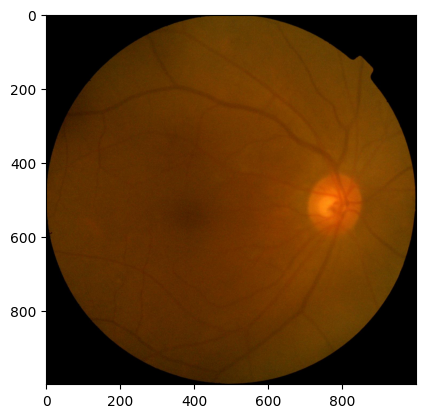

In [3]:
resized_images = []

#Using only 10 images so my computer doesn't crash
for i in range(0, 10):
    try:
        image = Image.open(images[i])
        resized_img = image.resize((1000,1000))
        resized_images.append(resized_img)
    except (OSError, IOError) as e:
        print("Error")

#check they have been resized 
plt.imshow(resized_images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


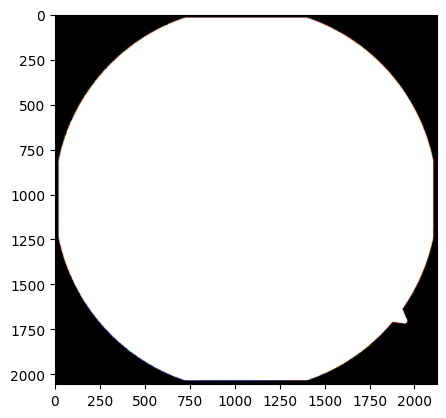

In [5]:
#I can't figure out how to normalize all channels
from numpy import asarray
im = []

for i in range(0, 10):
    try:
        image = Image.open(images[i])
        pixels = asarray(image)
        pixels = pixels.astype('float32')
        pixels / 255
        im.append(pixels)
    except (OSError) as e:
        print("Error")

plt.imshow(im[3])
print(im[0])

In [ ]:
#train-test split (no labels yet)
X_train, X_test, y_train, y_test = train_test_split(im, y, test_size=0.2, random_state=42)

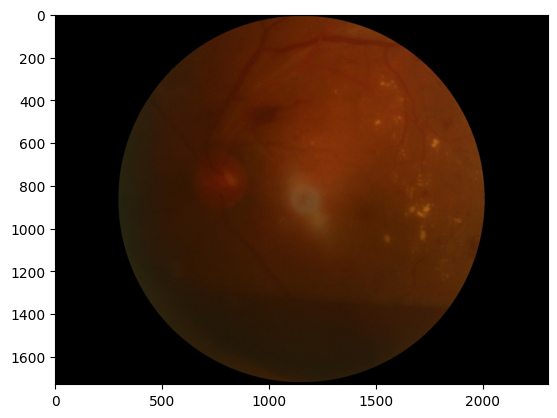

In [7]:
#show a proliferative image
img2 = imread(images[20])
plt.imshow(img2)

In [8]:
min_intensity_channel = np.min(img2, axis=(0, 1))
max_intensity_channel = np.max(img2, axis=(0, 1))

print("Minimum Intensity for each channel:", min_intensity_channel)
print("Maximum Intensity for each channel:", max_intensity_channel)

Minimum Intensity for each channel: [0 0 0]
Maximum Intensity for each channel: [179 103  62]


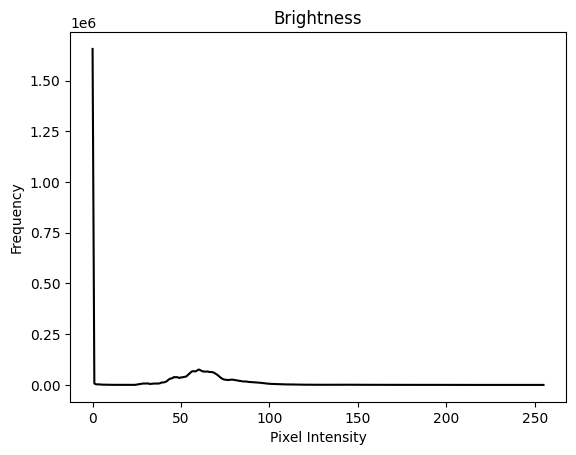

In [40]:
#histogram of the pixel values to see the brightness range
histogram_before = cv2.calcHist([img2], [0], None, [256], [0, 256])
plt.plot(histogram_before, color='black')
plt.title("Brightness")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

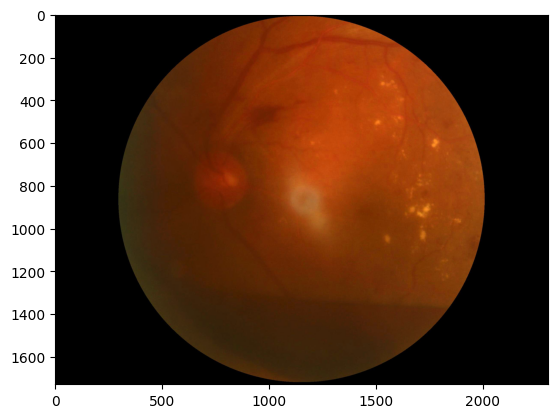

In [9]:
#METHOD 1 for increasing brightness (RGB to HSV then increase V and convert back)
image_cv = imread(images[20])
image_hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
value = image_hsv[:,:,2]
increased_v = np.clip(value*1.5, 0, 255).astype(np.uint8)
image_hsv[:,:,2] = increased_v
enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
plt.imshow(enhanced)


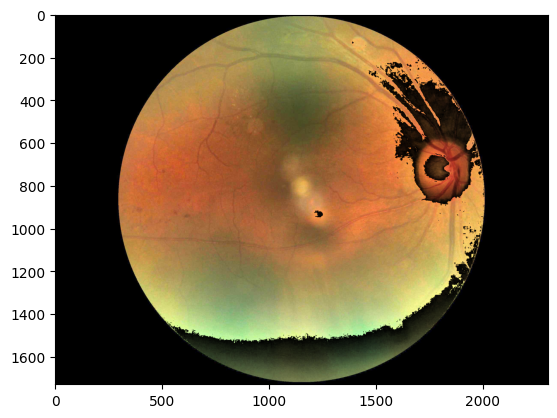

In [12]:
#same method as above but you can see that a high factor is problematic
image_cv = imread(images[7])
image_hsv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2HSV)
value = image_hsv[:,:,2]
increased_v = np.clip(value*3, 0, 255).astype(np.uint8)
image_hsv[:,:,2] = increased_v
enhanced_bad = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
plt.imshow(enhanced_bad)

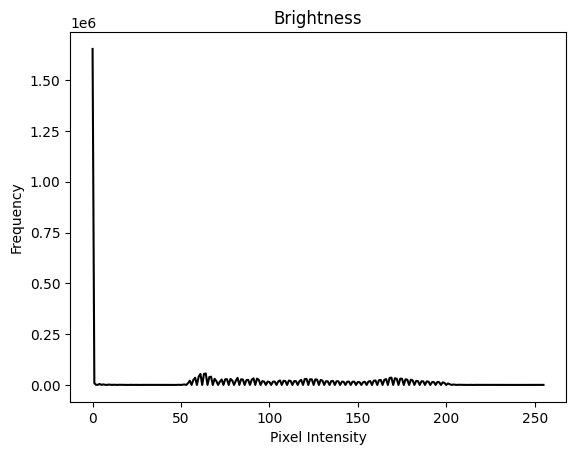

In [10]:
#histogram after brightening to see the pixel value difference
histogram_after = cv2.calcHist([enhanced], [0], None, [256], [0, 256])
plt.plot(histogram_after, color='black')
plt.title("Brightness")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [14]:
min_intensity_channel = np.min(enhanced, axis=(0, 1))
max_intensity_channel = np.max(enhanced, axis=(0, 1))

print("Minimum Intensity for each channel:", min_intensity_channel)
print("Maximum Intensity for each channel:", max_intensity_channel)

Minimum Intensity for each channel: [0 0 0]
Maximum Intensity for each channel: [255 150  92]


In [15]:
min_intensity_channel = np.min(enhanced, axis=(0, 1))
max_intensity_channel = np.max(enhanced, axis=(0, 1))

print("Minimum Intensity for each channel:", min_intensity_channel)
print("Maximum Intensity for each channel:", max_intensity_channel)

Minimum Intensity for each channel: [0 0 0]
Maximum Intensity for each channel: [255 150  92]


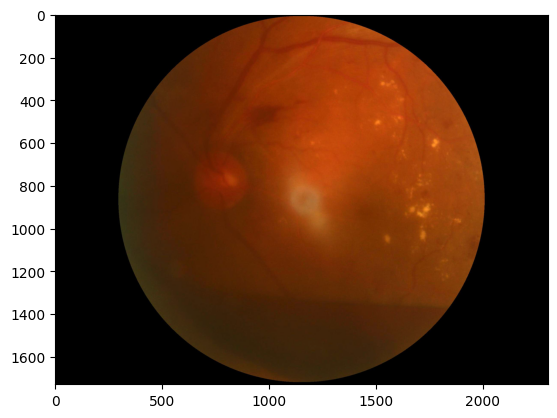

In [16]:
#METHOD 2 for increasing brightness (works much better)
image = Image.open(images[20])
enhancer = ImageEnhance.Brightness(image)
img_bright = enhancer.enhance(1.5)

plt.imshow(img_bright)

In [17]:
min_intensity_channel = np.min(img_bright, axis=(0, 1))
max_intensity_channel = np.max(img_bright, axis=(0, 1))

print("Minimum Intensity for each channel:", min_intensity_channel)
print("Maximum Intensity for each channel:", max_intensity_channel)

#This directly multiplies each original pixel value by 1.5 while the other one is slightly off

Minimum Intensity for each channel: [0 0 0]
Maximum Intensity for each channel: [255 154  93]


In [37]:
def enhance_luminance(image_path, gamma=1/2.2):
    image = cv2.imread(image_path)

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v_channel = hsv_image[:, :, 2]

    normalized_v = v_channel / 255.0

    gamma_corrected_v = np.power(normalized_v, gamma)

    enhanced_v = (gamma_corrected_v * 255.0).astype(np.uint8)

    hsv_image[:, :, 2] = enhanced_v

    enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    return enhanced_image



In [38]:
def enhance_contrast(image_path, gamma=1/2.2, clip_limit=0.3, tiles=(4, 4)):
    original_image = cv2.imread(images[20])

    enhanced_image = enhance_luminance(image_path, gamma)

    lab_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2Lab)

    l_channel = lab_image[:, :, 0]

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tiles)
    enhanced_l_channel = clahe.apply(l_channel)

    lab_image[:, :, 0] = enhanced_l_channel

    enhanced_image = cv2.cvtColor(lab_image, cv2.COLOR_Lab2BGR)

    return enhanced_image


image_path = images[20]
enhanced_luminance_image = enhance_luminance(image_path)

enhanced_contrast_image = enhance_contrast(image_path)

original_image = cv2.imread(image_path)
combined_image = np.hstack((original_image, enhanced_luminance_image, enhanced_contrast_image))
cv2.namedWindow('Enhanced Image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Enhanced Image', 1500, 400)
cv2.imshow('Enhanced Image', combined_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


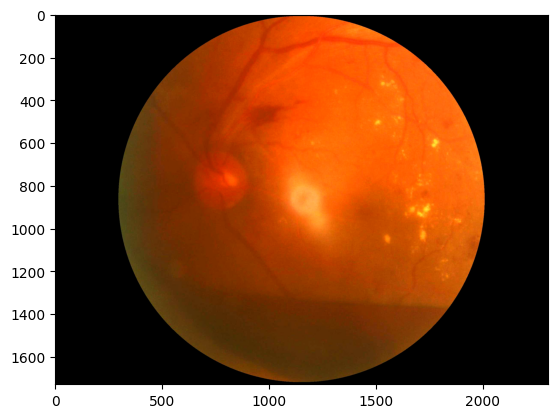

In [42]:
#method 2 also has contrast adjustment
image_contrast = Image.open(images[7])
enhancer = ImageEnhance.Contrast(img_bright)
img_c = enhancer.enhance(1.25)

plt.imshow(img_c)